In [1]:
%pylab inline
import circlesquare
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We begin by initializing a model of our software product with 10000 vulnerabilities randomly scattered throughout the code. These vulnerabilities are what would exist on day one of the software being released if the vendor did no quality control or bugfinding whatsoever.

In [3]:
product = circlesquare.CircleSquare()
product.make_pts(10000)

We'll now create views for both the offensive team, and the defensive team. To kick things off, we'll assume for simplicity that the defensive team has just as much likelihood of finding a bug in a given round of searching as the offensive team.

So far, there is no correlation between the likelihood that a given vulnerability will be discovered by the offensive team, and the likelihood that it will be discovered by the offensive team.

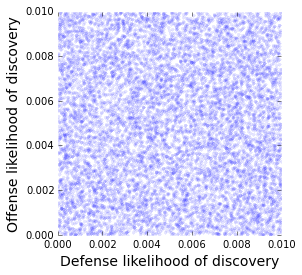

In [5]:
defense = product.new_interface('Defense')
defense.make_circles(max_area=.01)

offense = product.new_interface('Offense')
offense.make_circles(max_area=.01)

plt.figure(figsize=(4,4))
defense.plot_correlation(offense)

It is reasonable to assume that on day 1 of the software being released, there is at least *some* correlation between the likelihood of an offensive researcher and a defensive researcher discovering the vulnerability, so we'll initialize them as having learned some from one another.

(0.51387979956563756, 0.0)

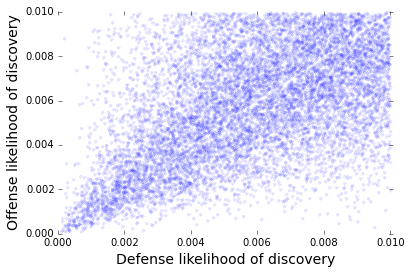

In [7]:
for i in range(50):
    defense.learn(offense, .1, .1)
    offense.learn(defense, .1, .1)

plt.figure(figsize=(4,4))    
defense.plot_correlation(offense)
defense.get_correlation(offense)

We assume that the defensive team does some bugfinding before they release the software, so we 'harden' it appropriately.

(0.53420476951867812, 0.0)

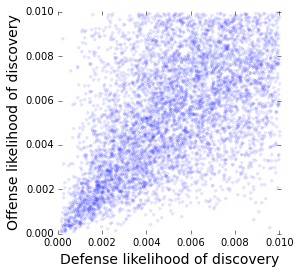

In [8]:
defense.harden(100)
defense.update()
offense.update()

plt.figure(figsize=(4,4))    
defense.plot_correlation(offense)
defense.get_correlation(offense)

We see now some interesting things. Because correlation is mild, the defensive team has patched a number of vulnerabilities that are for them low-hanging fruit, but for the offensive team unlikely discoveries. Conversely, the mean likelihood of a given vulnerability being discovered by the offensive team is now higher than for the defensive team.

In [ ]:
print 'offensive:', offense.circles.area.mean()
print 'defensive:', defense.circles.area.mean()

In [ ]:
offense.circles.area.mean()/defense.circles.area.mean()

# Generate Sim Data

In [19]:
learning_effort=.1
rounds=1000
dt=20

# product = circlesquare.CircleSquare()
# product.make_pts(10000)

# offense = product.new_interface('Offense')
# offense.make_circles(max_area=.01)

output = []
stockpile = offense.seek(0) #initialize by conducting zero rounds of searching.

for i in range(0,rounds,dt):
    output.append({'round':i,
                   'stockpile':stockpile.sum()})

    stockpile = stockpile | offense.seek(dt)
    stockpile = stockpile.loc[product.pts.index]

df = pd.DataFrame(output).set_index('round')
df.head()


,stockpile
round,
0,0
20,941
40,1781
60,2461
80,3137


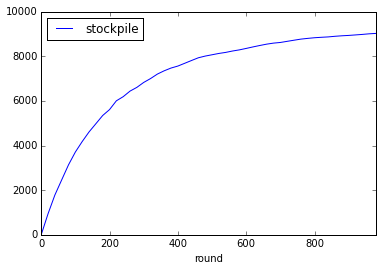

In [20]:
df.plot()

In [21]:
stockpile.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

# post release
At this point the model is set up in a manner that could plausibly represent the post-release version of the software. We'll have the offensive team look for vulnerabilities, and see what they come up with.

In [9]:
offensive_discoveries = []
discoveries = offense.seek(25)
offensive_discoveries.append(set(discoveries[discoveries==True].index))

NameError: name 'offensive_discoveries' is not defined

In [10]:
discoveries[discoveries==True].index

Int64Index([  17,   30,   36,   47,   71,   81,   96,  111,  157,  196, 
            ...
            9887, 9893, 9899, 9915, 9948, 9957, 9959, 9967, 9985, 9998],
           dtype='int64', length=776)

In [15]:
data = pd.read_csv('plot_data.csv', skipinitialspace=True)
print data.size
data.head()

183624


,# unix_time,cycles_done,cur_path,paths_total,pending_total,pending_favs,map_size,unique_crashes,unique_hangs,max_depth,execs_per_sec,execs_so_far
0,1440533859,0,0,1,1,1,3.97%,0,0,1,256.41,10
1,1440533864,0,0,38,38,1,4.55%,0,0,2,195.88,818
2,1440533869,0,0,77,77,1,5.69%,0,0,2,262.76,2123
3,1440533875,0,0,100,100,1,5.81%,0,0,2,290.70,3660
4,1440533880,0,0,109,109,1,5.85%,0,0,2,304.48,5255


In [18]:
data.tail()

,# unix_time,cycles_done,cur_path,paths_total,pending_total,pending_favs,map_size,unique_crashes,unique_hangs,max_depth,execs_per_sec,execs_so_far
15297,1440790451,0,6619,28336,27667,6342,100.00%,88,500,5,235.64,45557714
15298,1440790461,0,6619,28337,27668,6342,100.00%,88,500,5,236.92,45559860
15299,1440790467,0,6619,28338,27669,6342,100.00%,88,500,5,233.28,45561066
15300,1440790488,0,6619,28340,27671,6342,100.00%,88,500,5,234.97,45565065
15301,1440790519,0,6619,28341,27672,6342,100.00%,88,500,5,225.54,45571739


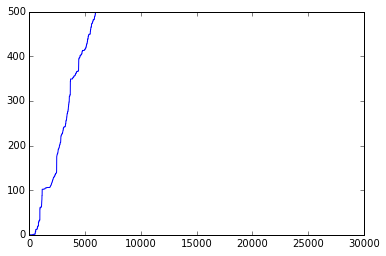

In [17]:
plt.plot(data['paths_total'], data['unique_hangs'])

In [11]:
offensive_discoveries = []
for i in range(3):
    discoveries = offense.seek(25)
    offensive_discoveries.append(set(discoveries[discoveries==True]))
    defense.harden(25)
    defense.update()
    offense.update()


KeyboardInterrupt: 

How many of the bugs that the offensive team found are still present after the hardening?

In [ ]:
len(set(product.pts.index) & set(offensive_findings_round_1[offensive_findings_round_1==True].index))

In [ ]:
offensive_findings_round_2 = offense.seek(20)

In [ ]:
sum(defensive_findings_round_1 & defensive_findings_round_2)